In [1]:
from typing import Union, Optional, List

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from models import reina2016, pentzer2014pow
import utils as u
import pandas as pd
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
# abbrs = (*abbrs, "D05", "D11", "D18", "D19", "D20", "D21", "D22")
abbrs = (
    "M01",
    "M02",
    "M03",
    "M04",
    "M05",
    "M06",
    "M07",
    # "D01",
    # "D02",
    # "D05",
    # "D09",
    # "D11",
    # "D12",
    # "D13",
    # "D14",
    # "D16",
    # "D18",
    # "D19",
    # "D20",
    # "D21",
    # "D22",
    # "R02",
    # "R09",
    # "R03",
    # "S01",
    # "S31",
    # "TB",
)
abbrs = sorted(abbrs)
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

rot_abbrs = ("M03", "M04", "M05", "M06")
lin_abbrs = ("M01", "M02", "M07")
highlighted_abbrs = ("M03", "M04", "M05", "M06")
# highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [3]:
dfs = {}
pdfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    reina_df = reina2016.reina2016(abbr);
    dfs[abbr] = reina_df
    pe_df = pentzer2014pow.pentzer2014pow(abbr, df=reina_df)
    pdfs[abbr] = pe_df


M01


100%|██████████| 101/101 [00:00<00:00, 3527.97it/s]


M01 : Exported PENTZER2014POW CSV in data/runs/M01/models/M01_2022-09-14-19-01-10-AP-LinParking01_pentzer2014pow.csv
M02


100%|██████████| 188/188 [00:00<00:00, 3956.57it/s]


M02 : Exported PENTZER2014POW CSV in data/runs/M02/models/M02_2022-09-14-19-05-20-AP-LinParking02_pentzer2014pow.csv
M03


100%|██████████| 186/186 [00:00<00:00, 2982.46it/s]


M03 : Exported PENTZER2014POW CSV in data/runs/M03/models/M03_2022-09-14-19-09-59-AP-RotParkingCCW01_pentzer2014pow.csv
M04


100%|██████████| 195/195 [00:00<00:00, 3154.93it/s]


M04 : Exported PENTZER2014POW CSV in data/runs/M04/models/M04_2022-09-14-19-13-56-AP-RotParkingCW02_pentzer2014pow.csv
M05


100%|██████████| 71/71 [00:00<00:00, 676.49it/s]


M05 : Exported PENTZER2014POW CSV in data/runs/M05/models/M05_2022-09-12-15-14-00-GD-RotDumpCCW01_pentzer2014pow.csv
M06


100%|██████████| 137/137 [00:00<00:00, 1787.02it/s]


M06 : Exported PENTZER2014POW CSV in data/runs/M06/models/M06_2022-09-12-15-16-51-GD-RotDumpCCW02_pentzer2014pow.csv
M07


100%|██████████| 195/195 [00:00<00:00, 1485.84it/s]


M07 : Exported PENTZER2014POW CSV in data/runs/M07/models/M07_2022-09-12-15-08-14-GD-LinDump_pentzer2014pow.csv


In [4]:
model_name = pentzer2014pow.__MODEL_NAME__.lower()
# figdir = u.get_figdir("summary", subdir=model_name)
model_name = pentzer2014pow.__MODEL_NAME__.title()


Text(0.5, 1.0, 'M01 vs M02 vs M03 vs M04 vs M05 vs M06 vs M07 - G - Pentzer2014Pow')

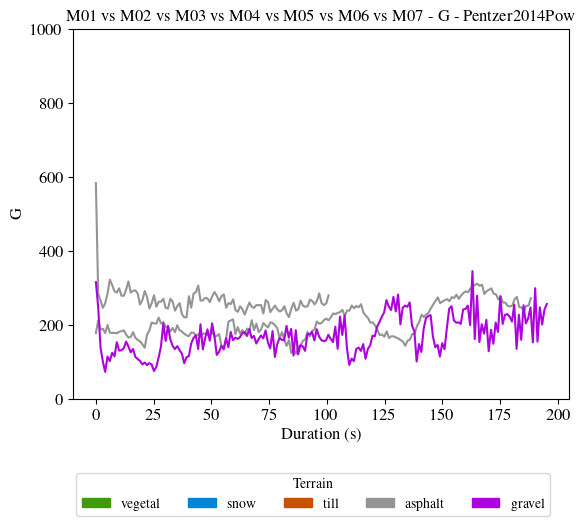

In [18]:
fig, ax = plt.subplots()

for abbr in abbrs:
    if abbr in rot_abbrs:
        continue
    col = cols[abbr]
    # col = "r" if abbr in highlighted_abbrs else col
    df = dfs[abbr]
    df["G"] = df.P_motion / (df.vL.abs() + df.vR.abs())
    ax.plot(df.time_rel, df.G, col, label=abbr)
add_terrain_legend(fig)
ax.set_ylim((0, 1000))
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("G")
ax.set_title(f"{' vs '.join(abbrs)} - G - {model_name}")

# fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_BSnaive.jpg", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Bs_naive, col, label=abbr)
ax.set_ylim((0, 4))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$B_S$")
ax.set_title(f"{' vs '.join(abbrs)} - Naive $B_S$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_BSnaive.jpg", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots()

rot_abbrs = ("M03", "M04", "M05", "M06")
rot_highlighted = ("S23,")

for abbr in rot_abbrs:
    col = cols[abbr]
    col = "r" if abbr in rot_highlighted else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Bs_naive, col, label=abbr)
ax.set_ylim((0, 2.5))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$B_S$")
ax.set_title(f"{' vs '.join(abbrs)} - Naive $B_S$ - {model_name}")
ax.grid(visible=True, which="minor")
ax.minorticks_on()

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rot.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].cmd_rho, col, label=abbr)
# ax.set_ylim((-0.5, 1))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("${\\rho}_{cmd}$")
ax.set_title(f"{' vs '.join(abbrs)} - ${{\\rho}}_{{cmd}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rhocmd.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].rho, col, label=abbr)
# ax.set_ylim((-0.5, 1))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\\rho$")
ax.set_title(f"{' vs '.join(abbrs)} - $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rho.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

abbr="R09"
col = cols[abbr]
col = "r" if abbr in highlighted_abbrs else col
ax.plot(dfs[abbr].time_rel, dfs[abbr].rho, col, label=abbr)
# ax.set_ylim((-0.5, 1))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\\rho$")
ax.set_title(f"{' vs '.join(abbrs)} - $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rho.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

abbrs = ("M01", "M02", "M03", "M04")
for abbr in abbrs:
    col = cols[abbr]
    # col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].cmd_rho, dfs[abbr].rho, col, marker="o", linestyle="", label=abbr)
# ax.set_ylim((-0.5, 1))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("${\\rho}_{cmd}$")
ax.set_ylabel("$\\rho$")
ax.set_title(f"Main motion primitives - ${{\\rho}}_{{cmd}}$ vs $\\rho$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rhovsrho.jpg", bbox_inches="tight")